In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-data/tesla_data.csv


# ****Loading Data

In [65]:
df=pd.read_csv('/kaggle/input/tesla-stock-data/tesla_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Cumulative Open,Price Change
0,2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700,282.829987,NaN
1,2022-08-30,287.869995,288.480011,272.649994,277.700012,277.700012,50541800,570.699982,5.040009
2,2022-08-31,280.619995,281.250000,271.809998,275.609985,275.609985,52107300,851.319977,-7.250000
3,2022-09-01,272.579987,277.579987,266.149994,277.160004,277.160004,54287000,1123.899963,-8.040009
4,2022-09-02,281.070007,282.350006,269.079987,270.209991,270.209991,50890100,1404.969971,8.490021


In [66]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Cumulative Open', 'Price Change'],
      dtype='object')

In [67]:
df.shape

(251, 9)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             251 non-null    object 
 1   Open             251 non-null    float64
 2   High             251 non-null    float64
 3   Low              251 non-null    float64
 4   Close            251 non-null    float64
 5   Adj Close        251 non-null    float64
 6   Volume           251 non-null    int64  
 7   Cumulative Open  251 non-null    float64
 8   Price Change     250 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.6+ KB


In [69]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Open,Price Change
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,250.000000
mean,208.540438,213.040358,203.648127,208.426494,208.426494,1.274835e+08,26010.168127,-0.161000
std,48.217368,48.610792,47.720669,48.145007,48.145007,4.724183e+07,13961.264129,8.194105
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07,282.829987,-24.360001
25%,176.635002,182.419998,172.504997,178.474998,178.474998,9.351960e+07,15209.229912,-6.415005
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.219993e+08,25352.179886,-0.695007
75%,249.385002,253.034996,242.389999,249.570000,249.570000,1.599710e+08,36608.089920,5.782497
max,308.290009,313.799988,305.579987,309.070007,309.070007,3.065906e+08,52343.649948,24.850006


In [70]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Date' column to Unix timestamp
df['Timestamp'] = (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


# ****Correlation Of Features

In [71]:
corel=df.corr()
corel

,Date,Open,High,Low,Close,Adj Close,Volume,Cumulative Open,Price Change,Timestamp
Date,1.000000,0.078696,0.073032,0.093243,0.085733,0.085733,0.306907,0.996914,0.093101,1.000000
Open,0.078696,1.000000,0.997095,0.996504,0.991246,0.991246,-0.490278,0.084437,0.062896,0.078696
High,0.073032,0.997095,1.000000,0.997382,0.996283,0.996283,-0.474543,0.078248,0.051647,0.073032
Low,0.093243,0.996504,0.997382,1.000000,0.997136,0.997136,-0.495025,0.097711,0.057385,0.093243
Close,0.085733,0.991246,0.996283,0.997136,1.000000,1.000000,-0.481217,0.089567,0.046473,0.085733
Adj Close,0.085733,0.991246,0.996283,0.997136,1.000000,1.000000,-0.481217,0.089567,0.046473,0.085733
Volume,0.306907,-0.490278,-0.474543,-0.495025,-0.481217,-0.481217,1.000000,0.282329,0.098947,0.306907
Cumulative Open,0.996914,0.084437,0.078248,0.097711,0.089567,0.089567,0.282329,1.000000,0.079350,0.996914
Price Change,0.093101,0.062896,0.051647,0.057385,0.046473,0.046473,0.098947,0.079350,1.000000,0.093101
Timestamp,1.000000,0.078696,0.073032,0.093243,0.085733,0.085733,0.306907,0.996914,0.093101,1.000000


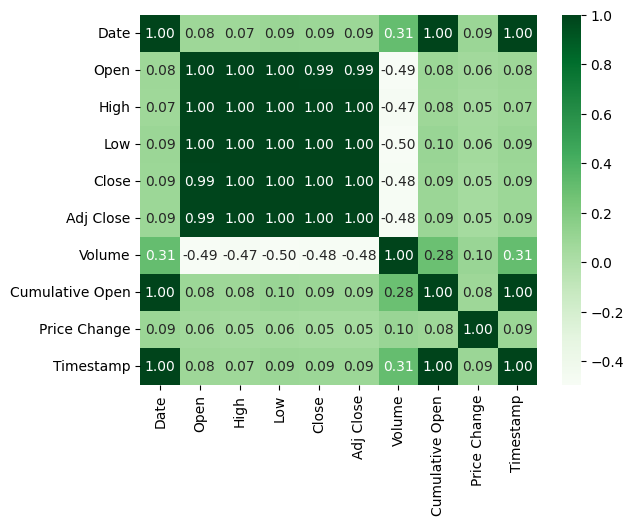

In [72]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

# ****Exploratory Data Analysis

# Distribution of Plots

<Figure size 1200x600 with 0 Axes>

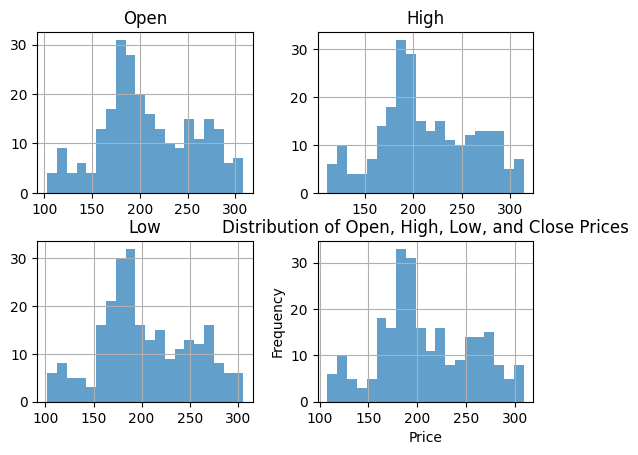

In [73]:
plt.figure(figsize=(12, 6))
df[['Open', 'High', 'Low', 'Close']].hist(bins=20, alpha=0.7)
plt.title('Distribution of Open, High, Low, and Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Time Series Analysis

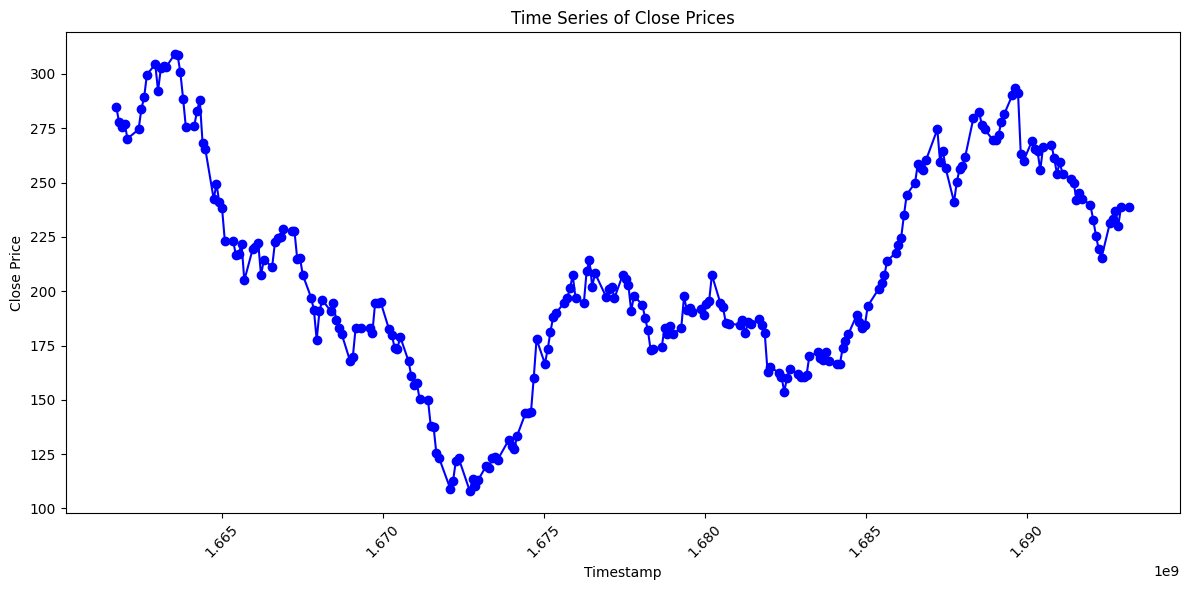

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Close'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Close Prices')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Volume Analysis

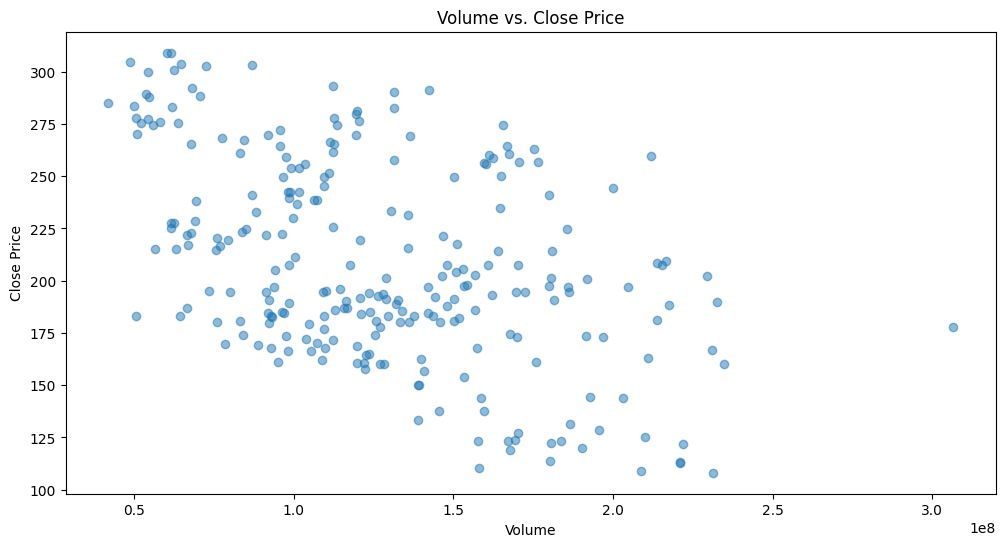

In [75]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


# Close vs Volume

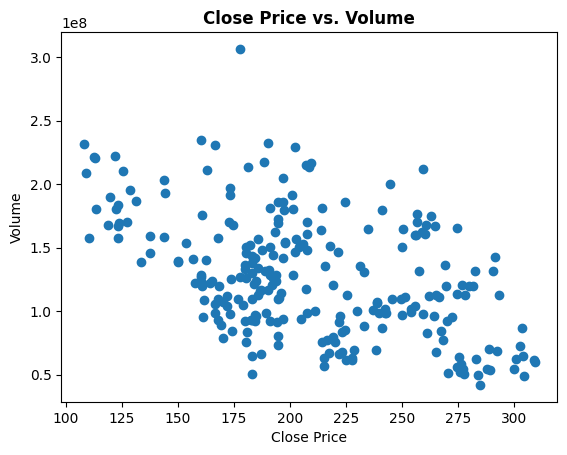

In [76]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()


# Moving Averages

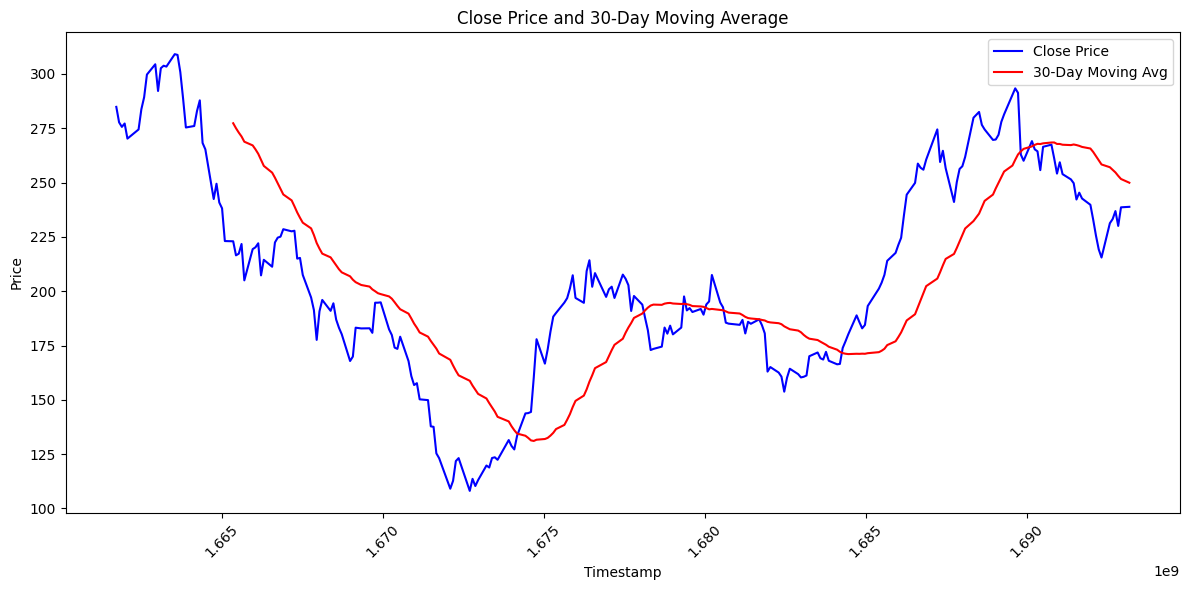

In [77]:
window = 30  # Adjust the window size
df['moving_avg'] = df['Close'].rolling(window=window).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Close'], label='Close Price', color='b')
plt.plot(df['Timestamp'], df['moving_avg'], label=f'{window}-Day Moving Avg', color='r')
plt.title(f'Close Price and {window}-Day Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Daily Price Change

# Candlestick Chart

In [78]:
!pip install mplfinance

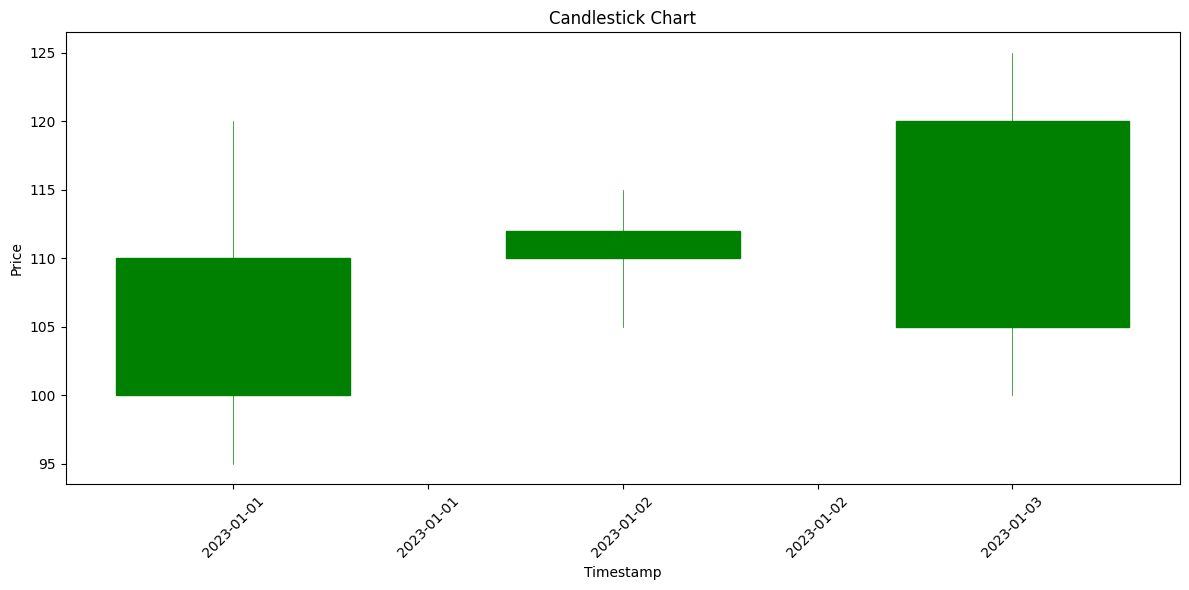

In [79]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Create a sample DataFrame with timestamp, open, high, low, close
# You can replace this with your actual DataFrame
data = {
    'timestamp': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'open': [100, 110, 105],
    'high': [120, 115, 125],
    'low': [95, 105, 100],
    'close': [110, 112, 120]
}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime format

ohlc = df[['timestamp', 'open', 'high', 'low', 'close']].copy()
ohlc['timestamp'] = mdates.date2num(ohlc['timestamp'])  # Convert to numerical format

plt.figure(figsize=(12, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Candlestick Chart')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ****Feature Engineering

In [80]:
df['Moving_Avg_Close'] = df['close'].rolling(window=7).mean()

# ****Modelling

In [81]:
df.shape

(3, 6)

# Data Preparation & Normalization

In [82]:
# Prepare the data for LSTM
X_train = df['close'].values.reshape(-1, 1)
y_train = df['close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)


# Reshaping Data

In [83]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

# Building a LSTM Model

In [84]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the number of epochs and batch size
epochs = 30
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:02<00:00, 13.73it/s]


# Predictions using LSTM

In [85]:
lstm_predictions = model.predict(X_test_lstm).flatten()

1/1 [==============================] - 0s 437ms/step


# Inverse transform of the predictions

In [86]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


# Visualization of LSTM predictions

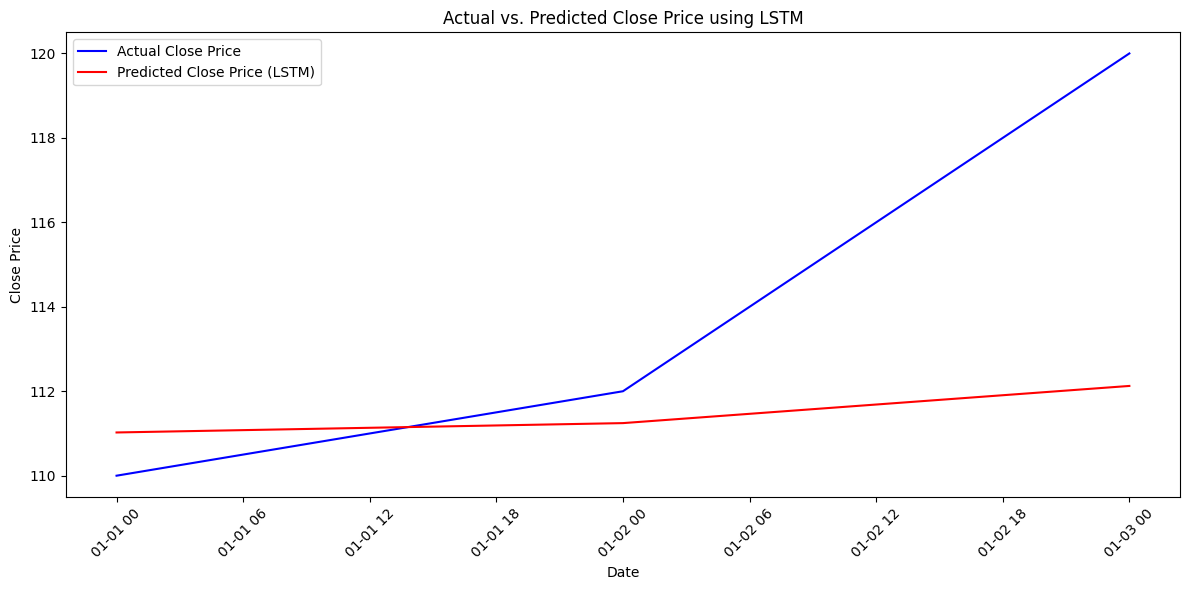

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['timestamp'], test_data['close'], label='Actual Close Price', color='b')
plt.plot(test_data['timestamp'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Mean Absolute Error

In [88]:
lstm_mae = mean_absolute_error(test_data['close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 3.217585245768229


In [89]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


date_index = test_data.index[-len(lstm_predictions):]  
predictions_df = pd.DataFrame({'timestamp': date_index, 'Predicted_Close': lstm_predictions.flatten()})


predictions_df.to_csv('predictions.csv', index=False)
